## RoBERTa introduction and Credits

Twitter-roBERTa-base for Sentiment Analysis

This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model, see XLM-T).

Reference Paper: TweetEval (Findings of EMNLP 2020).
Git Repo: Tweeteval official repository.
Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive


reference paper: https://aclanthology.org/2020.findings-emnlp.148/


the code used in this notebook as been extracted from the following repository: https://huggingface.co/blog/bert-101#7-how-to-get-started-using-bert


```
# from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)


# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
res = []
for text in texts:
  try:
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

  # # TF
  # model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
  # model.save_pretrained(MODEL)

  # text = "Good night 😊"
  # encoded_input = tokenizer(text, return_tensors='tf')
  # output = model(encoded_input)
  # scores = output[0][0].numpy()
  # scores = softmax(scores)
    d = {"text": text}
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        d[f"{l}"] = f'{np.round(float(s),4)}'
    res.append(d)
  except:
    d = {"text": text, "labels":"NA"}
    res.append(d)

```

# Sentiment Analysis 




In [20]:

def preprocess(text):
  new_text = []
  for t in text.split(" "):
    t = 'http' if t.startswith('http') else t
    new_text.append(t)
  return " ".join(new_text)

import re
def preprocess1(text):
   cleaned_text = re.sub(r'http[s]?://\S+', '', text)
   cleaned_text_no_specials = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_text)
   return cleaned_text_no_specials


In [2]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [3]:
def truncate_doc(doc, max_len=350):
  tokens = doc.split()
  truncated_tokens = tokens[:max_len]
  truncated_doc = " ".join(truncated_tokens)
  return truncated_doc

#defining the sentiment analysis function
def sentiment_analysis(texts):

  labels=[]
  mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
  with urllib.request.urlopen(mapping_link) as f:
      html = f.read().decode('utf-8').split("\n")
      csvreader = csv.reader(html, delimiter='\t')
  labels = [row[1] for row in csvreader if len(row) > 1]

  model = AutoModelForSequenceClassification.from_pretrained(MODEL)
  model.save_pretrained(MODEL)
  res = []
  for text in texts:
    try:
      encoded_input = tokenizer(text, return_tensors='pt')
      output = model(**encoded_input)
      scores = output[0][0].detach().numpy()
      scores = softmax(scores)
      d = {"text": text}
      ranking = np.argsort(scores)
      ranking = ranking[::-1]
      for i in range(scores.shape[0]):
        l = labels[ranking[i]]
        s = scores[ranking[i]]
        d[f"{l}"] = f'{np.round(float(s),4)}'
      res.append(d)

    except:
      try:
        text = truncate_doc(text)
        encoded_input = tokenizer(text, return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        d = {"text": text}
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]
          d[f"{l}"] = f'{np.round(float(s),4)}'
        res.append(d)
      except:
        d = {"text": text, "labels":"Error length"}
        res.append(d)

  return res


## Depression Posts Sentiment Analysis



In [4]:
#load data
import pandas as pd
df0 = pd.read_csv("depression.csv")

In [5]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [6]:
depression_p = df0[['tot_post','tot_post_cleaned']]
depression_p.head()

,tot_post,tot_post_cleaned
0,Shout out to the particular hell that is funct...,Shout out to the particular hell that is funct...
1,If 10 years ago someone told me that in 10 yea...,If 10 years ago someone told me that in 10 yea...
2,"It’s like I died at 15, but my body just kept ...",Its like I died at 15 but my body just kept on...
3,High-functioning depression: I feel like I'm l...,Highfunctioning depression I feel like Im livi...
4,I cried in front of my family today. They ende...,I cried in front of my family today They ended...


In [7]:
texts = [t for t in depression_p['tot_post_cleaned']]
print(len(texts))

1547


In [8]:
import pandas as pd

res = sentiment_analysis(texts)
sentiment_depression_p = pd.DataFrame(res)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [9]:
sentiment_depression_p

,text,negative,neutral,positive
0,Shout out to the particular hell that is funct...,0.8744,0.0988,0.0268
1,If 10 years ago someone told me that in 10 yea...,0.6652,0.2809,0.0539
2,Its like I died at 15 but my body just kept on...,0.9423,0.0537,0.004
3,Highfunctioning depression I feel like Im livi...,0.8501,0.1262,0.0237
4,I cried in front of my family today They ended...,0.4905,0.338,0.1715
...,...,...,...,...
1542,I found a trick for tidying a very messy room ...,0.0543,0.2263,0.7194
1543,Im 50 Ive ruined my life I hate myself I have ...,0.9345,0.0581,0.0074
1544,I havent showered in 2 weeks and I dont know h...,0.8358,0.142,0.0222
1545,Im depressed but I have no reason to be Im so ...,0.7885,0.1718,0.0397


In [10]:
l = sentiment_depression_p[sentiment_depression_p.negative.isnull()]['text'].tolist()

In [11]:
l #must be empty


[]

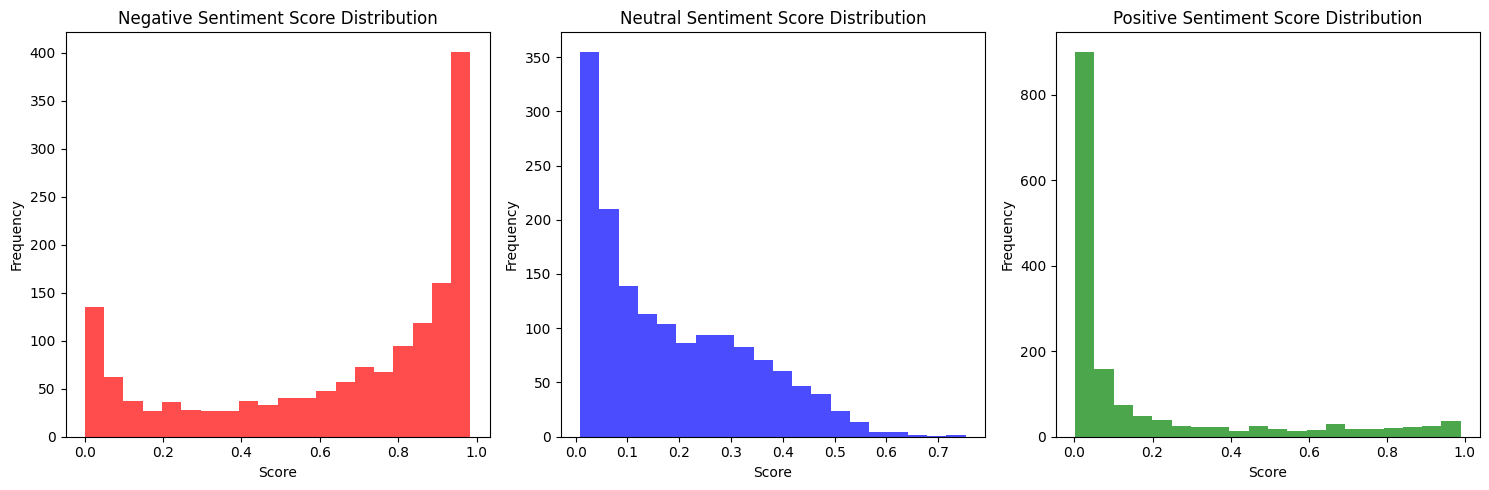

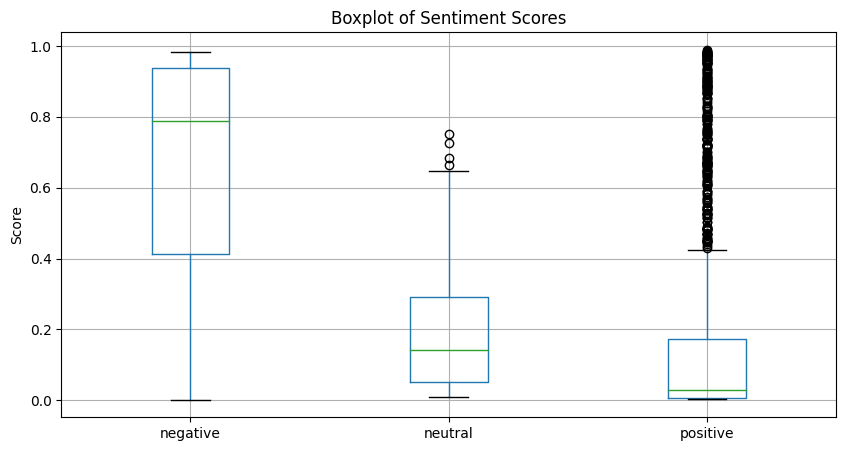

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = sentiment_depression_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(15, 5))

# Histogram for negative sentiment scores
plt.subplot(1, 3, 1)
plt.hist(data_numeric['negative'], bins=20, color='red', alpha=0.7)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for neutral sentiment scores
plt.subplot(1, 3, 2)
plt.hist(data_numeric['neutral'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for positive sentiment scores
plt.subplot(1, 3, 3)
plt.hist(data_numeric['positive'], bins=20, color='green', alpha=0.7)
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for the sentiment scores
plt.figure(figsize=(10, 5))

# Boxplot for all sentiment scores
data_numeric.boxplot(column=['negative', 'neutral', 'positive'])
plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Score')
plt.show()

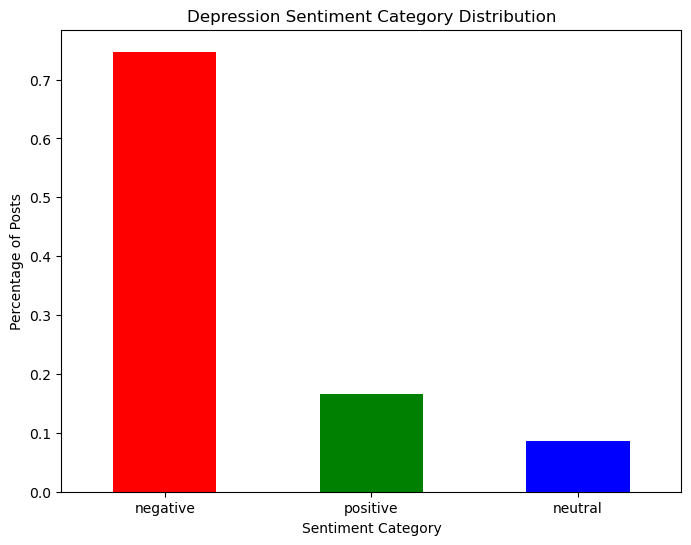

In [8]:
data_numeric['max'] = data_numeric[['negative', 'neutral', 'positive']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric) 
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Depression Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [14]:
sentiment_depression_p.to_csv("sentiment_depression_p.csv")

## Anger Posts Sentiment Analysis

In [30]:
#load data
import pandas as pd
df0 = pd.read_csv("anger.csv")

In [31]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [32]:
anger_p = df0[['tot_post','tot_post_cleaned']]
anger_p.head()

,tot_post,tot_post_cleaned
0,Not a single person has upvoted anything I've ...,Not a single person has upvoted anything Ive p...
1,how am i meant to build karma if they don't le...,how am i meant to build karma if they dont let...
2,FUCK you fuck you fuck you fuck you fuck you f...,FUCK you fuck you fuck you fuck you fuck you f...
3,GO AWAY TIK TOK GRRRRR FUCK UR ADS,GO AWAY TIK TOK GRRRRR FUCK UR ADS
4,Fuck the world and fuck the monsters in it. Fu...,Fuck the world and fuck the monsters in it Fuc...


In [33]:
texts = [t for t in anger_p['tot_post_cleaned']]
print(len(texts))

1937


In [34]:
import pandas as pd

res = sentiment_analysis(texts)
sentiment_anger_p = pd.DataFrame(res)

In [35]:
sentiment_anger_p

,text,negative,neutral,positive
0,Not a single person has upvoted anything Ive p...,0.9579,0.0368,0.0053
1,how am i meant to build karma if they dont let...,0.8294,0.1611,0.0095
2,FUCK you fuck you fuck you fuck you fuck you f...,0.9668,0.0262,0.007
3,GO AWAY TIK TOK GRRRRR FUCK UR ADS,0.9427,0.0484,0.0089
4,Fuck the world and fuck the monsters in it Fuc...,0.9809,0.016,0.0032
...,...,...,...,...
1932,Everything I do I rage at Everything I do extr...,0.9485,0.0475,0.004
1933,What should I do Everything is making me beyon...,0.9823,0.0155,0.0022
1934,Found out the main cause for my anger I though...,0.3767,0.3661,0.2573
1935,Is it normal to scratch yourself when angry Of...,0.9323,0.064,0.0037


In [36]:
l = sentiment_anger_p[sentiment_anger_p.negative.isnull()]['text'].tolist()
len(l)

0

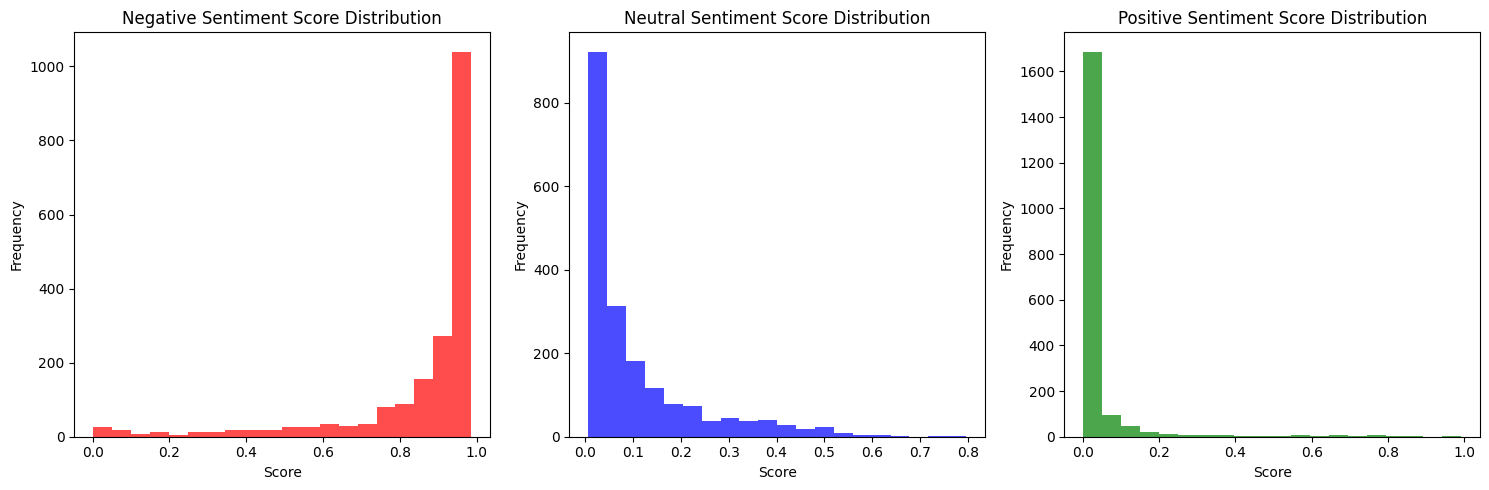

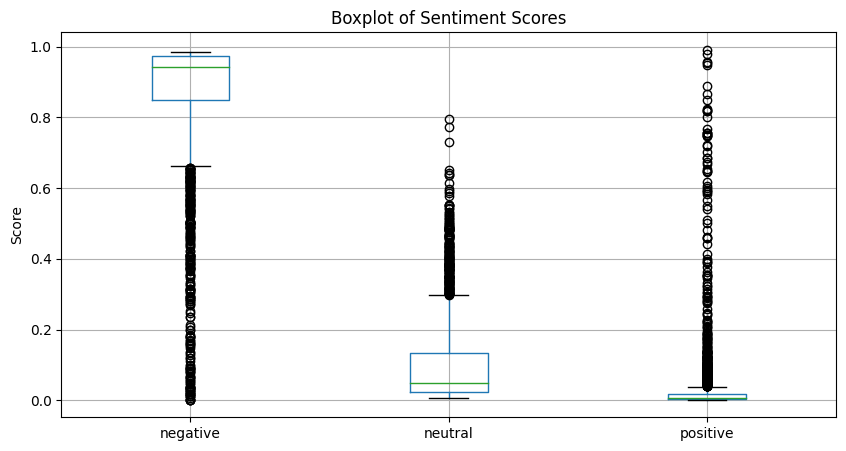

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = sentiment_anger_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(15, 5))

# Histogram for negative sentiment scores
plt.subplot(1, 3, 1)
plt.hist(data_numeric['negative'], bins=20, color='red', alpha=0.7)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for neutral sentiment scores
plt.subplot(1, 3, 2)
plt.hist(data_numeric['neutral'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for positive sentiment scores
plt.subplot(1, 3, 3)
plt.hist(data_numeric['positive'], bins=20, color='green', alpha=0.7)
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for the sentiment scores
plt.figure(figsize=(10, 5))

# Boxplot for all sentiment scores
data_numeric.boxplot(column=['negative', 'neutral', 'positive'])
plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Score')
plt.show()

max
negative    0.934435
neutral     0.039236
positive    0.026329
Name: count, dtype: float64


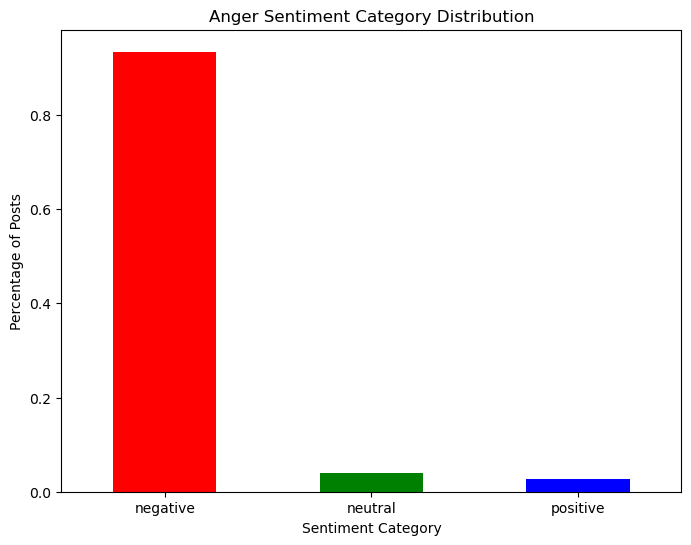

In [11]:
data_numeric['max'] = data_numeric[['negative', 'neutral', 'positive']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Anger Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [39]:
sentiment_anger_p.to_csv("sentiment_anger_p.csv")

## Anxiety Posts Sentiment Analysis

In [40]:
#load data
import pandas as pd
df0 = pd.read_csv("anxiety.csv")

In [41]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [42]:
anxiety_p = df0[['tot_post','tot_post_cleaned']]
anxiety_p.head()

,tot_post,tot_post_cleaned
0,"Professor here, if you have missed class, plea...",Professor here if you have missed class please...
1,My Uber driver had a panic attack mid-ride. He...,My Uber driver had a panic attack midride Here...
2,I was thinking why this sub has a lot more upv...,I was thinking why this sub has a lot more upv...
3,1. Anxiety makes it hard to go to sleep 2. Dep...,1 Anxiety makes it hard to go to sleep 2 Depre...
4,How to order from subway? I've been pretty muc...,How to order from subway Ive been pretty much ...


In [43]:
texts = [t for t in anxiety_p['tot_post_cleaned']]
print(len(texts))

790


In [44]:
import pandas as pd

res = sentiment_analysis(texts)
sentiment_anxiety_p = pd.DataFrame(res)
sentiment_anxiety_p

,text,positive,neutral,negative
0,Professor here if you have missed class please...,0.7442,0.2257,0.03
1,My Uber driver had a panic attack midride Here...,0.5674,0.3877,0.0449
2,I was thinking why this sub has a lot more upv...,0.0621,0.3765,0.5615
3,1 Anxiety makes it hard to go to sleep 2 Depre...,0.0034,0.0381,0.9585
4,How to order from subway Ive been pretty much ...,0.0048,0.0405,0.9547
...,...,...,...,...
785,Dear people that dont have social anxiety For ...,0.029,0.2189,0.7521
786,Tell me you have social anxiety without tellin...,0.0253,0.3383,0.6364
787,Was called a loser by a group of guys when exc...,0.0538,0.2439,0.7022
788,I Like Socially Anxious People This is probabl...,0.7172,0.2384,0.0444


In [45]:
l = sentiment_anxiety_p[sentiment_anxiety_p.negative.isnull()]['text'].tolist()
l

[]

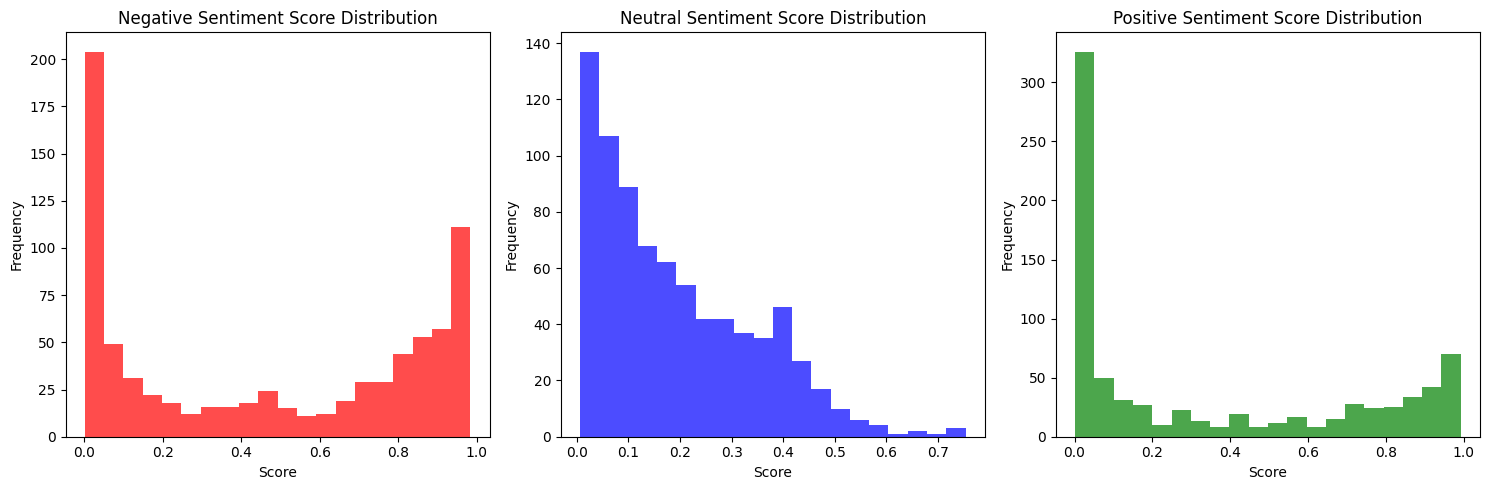

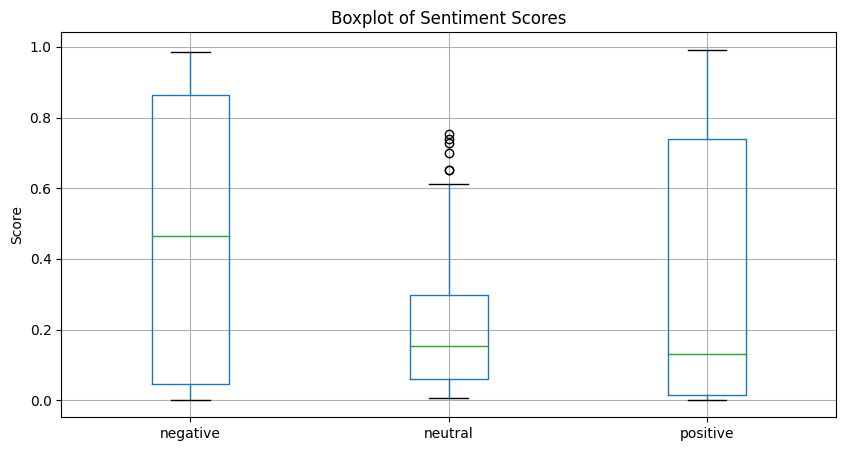

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = sentiment_anxiety_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(15, 5))

# Histogram for negative sentiment scores
plt.subplot(1, 3, 1)
plt.hist(data_numeric['negative'], bins=20, color='red', alpha=0.7)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for neutral sentiment scores
plt.subplot(1, 3, 2)
plt.hist(data_numeric['neutral'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for positive sentiment scores
plt.subplot(1, 3, 3)
plt.hist(data_numeric['positive'], bins=20, color='green', alpha=0.7)
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for the sentiment scores
plt.figure(figsize=(10, 5))

# Boxplot for all sentiment scores
data_numeric.boxplot(column=['negative', 'neutral', 'positive'])
plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Score')
plt.show()

max
negative    0.524051
positive    0.377215
neutral     0.098734
Name: count, dtype: float64


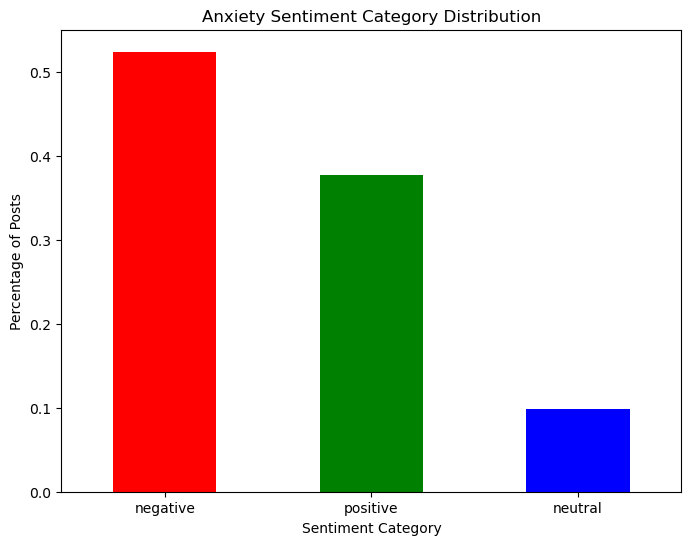

In [13]:
data_numeric['max'] = data_numeric[['negative', 'neutral', 'positive']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Anxiety Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [48]:
sentiment_anxiety_p.to_csv("sentiment_anxiety_p.csv")

## Relationships Posts Sentiment Ananlysis

In [24]:
#load data
import pandas as pd
df0 = pd.read_csv("relationship.csv")

In [25]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [51]:
rel_p = df0[['tot_post','tot_post_cleaned']]
rel_p.head()

,tot_post,tot_post_cleaned
0,To whoever needs to hear this. He made you fee...,To whoever needs to hear this He made you feel...
1,Has a toxic relationship messed my head up. I ...,Has a toxic relationship messed my head up I n...
2,Dodged a bullet I recently broke up with my bf...,Dodged a bullet I recently broke up with my bf...
3,Ex bf would make me wear his T-shirt’s over my...,Ex bf would make me wear his Tshirts over my s...
4,Looking at a toxic trait through a new lens Re...,Looking at a toxic trait through a new lens Re...


In [52]:
texts = [t for t in rel_p['tot_post_cleaned']]
print(len(texts))

890


In [ ]:
import pandas as pd

res = sentiment_analysis(texts)
sentiment_rel_p = pd.DataFrame(res)
sentiment_rel_p

In [ ]:
l = sentiment_rel_p[sentiment_rel_p.negative.isnull()]['text'].tolist()
l

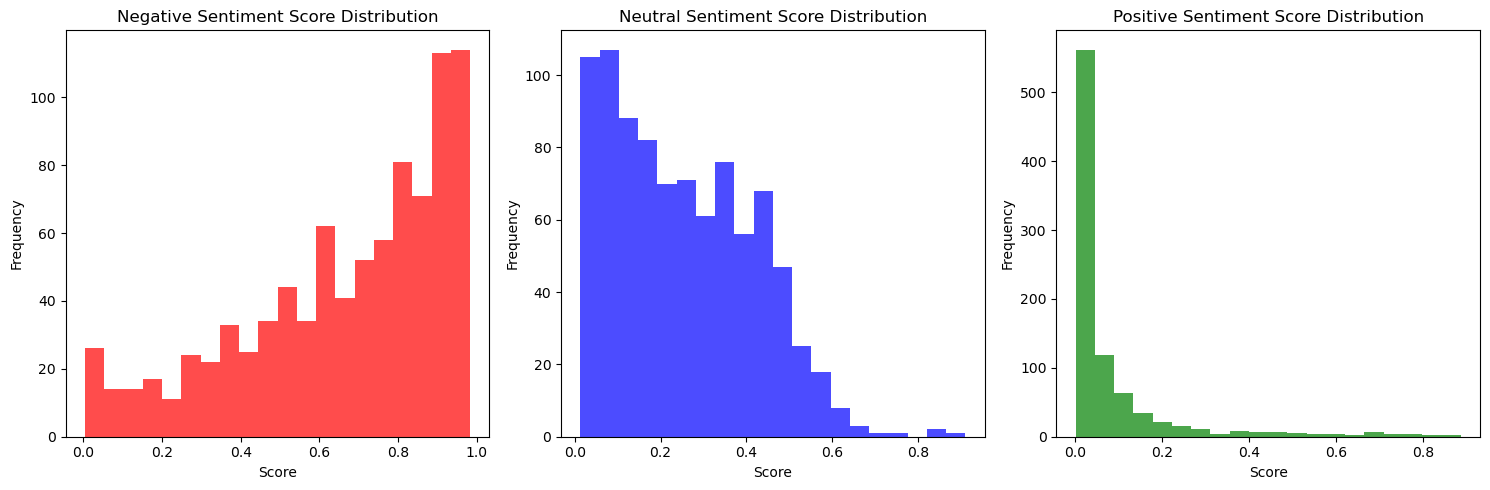

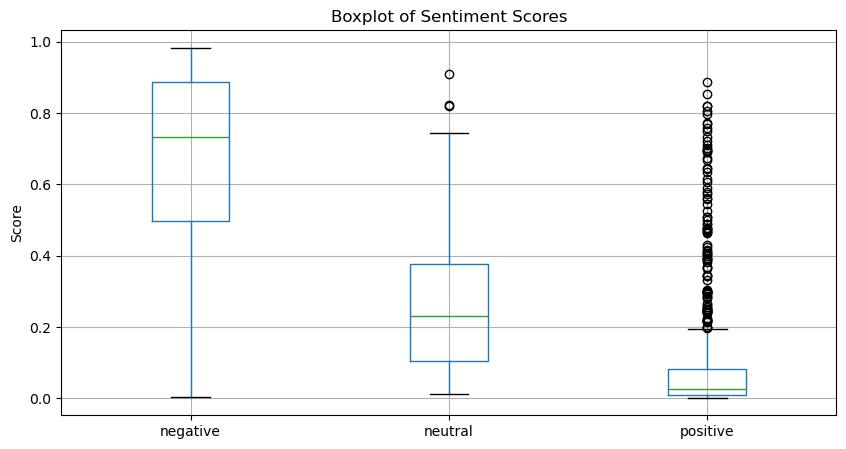

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = sentiment_rel_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(15, 5))

# Histogram for negative sentiment scores
plt.subplot(1, 3, 1)
plt.hist(data_numeric['negative'], bins=20, color='red', alpha=0.7)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for neutral sentiment scores
plt.subplot(1, 3, 2)
plt.hist(data_numeric['neutral'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for positive sentiment scores
plt.subplot(1, 3, 3)
plt.hist(data_numeric['positive'], bins=20, color='green', alpha=0.7)
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for the sentiment scores
plt.figure(figsize=(10, 5))

# Boxplot for all sentiment scores
data_numeric.boxplot(column=['negative', 'neutral', 'positive'])
plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Score')
plt.show()

max
negative    0.786517
neutral     0.160674
positive    0.052809
Name: count, dtype: float64


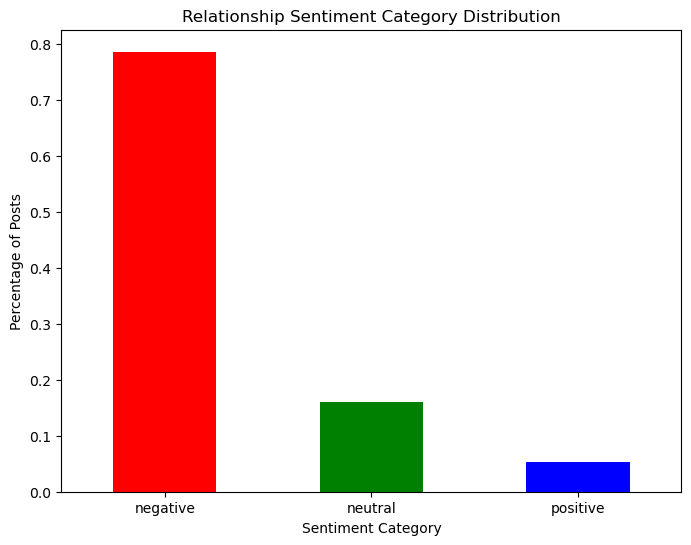

In [15]:
data_numeric['max'] = data_numeric[['negative', 'neutral', 'positive']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Relationship Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [ ]:
sentiment_rel_p.to_csv("sentiment_rel_p.csv")

## Stress Posts Sentiment Analysis

In [ ]:
#load data
import pandas as pd
df0 = pd.read_csv("stress.csv")

In [ ]:
#cleaning
df0['tot_post'] = df0['title'] + ' ' + df0['text']
df0['tot_post_cleaned'] = df0.tot_post.apply(preprocess1)

In [ ]:
stress_p = df0[['tot_post','tot_post_cleaned']]
stress_p.head()

In [ ]:
texts = [t for t in stress_p['tot_post_cleaned']]
print(len(texts))

In [ ]:
import pandas as pd

res = sentiment_analysis(texts)
sentiment_stress_p = pd.DataFrame(res)
sentiment_stress_p

In [ ]:
l = sentiment_stress_p[sentiment_stress_p.negative.isnull()]['text'].tolist()
l

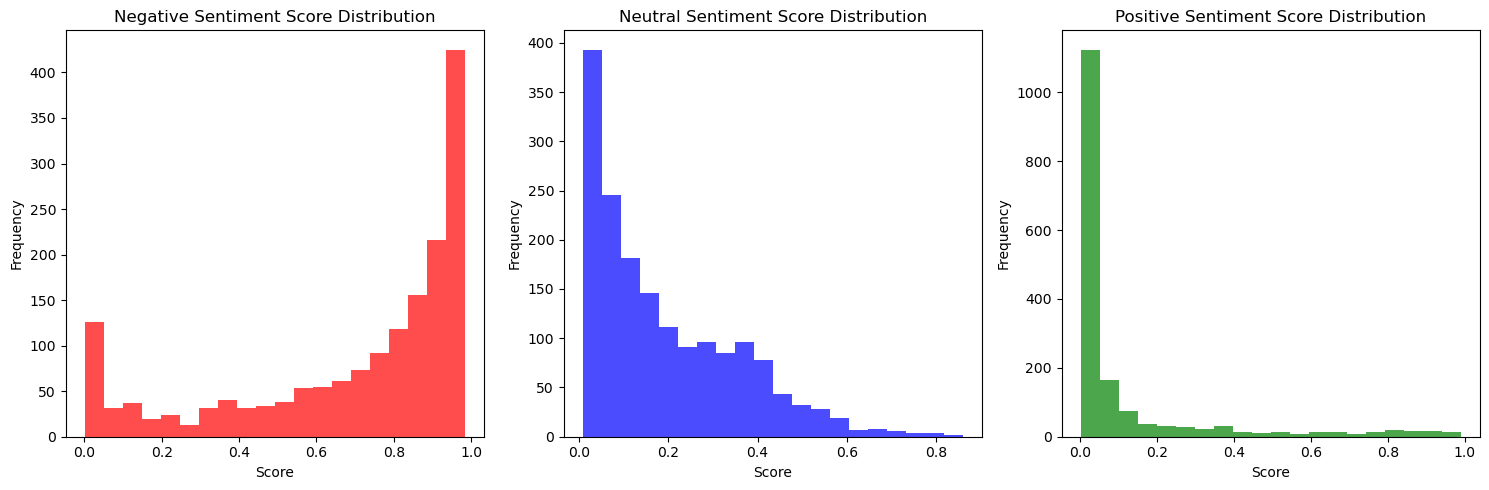

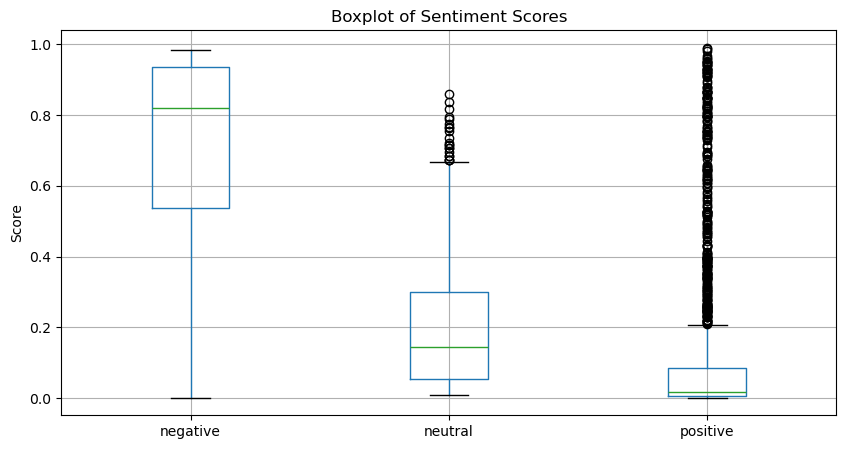

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = sentiment_stress_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(15, 5))

# Histogram for negative sentiment scores
plt.subplot(1, 3, 1)
plt.hist(data_numeric['negative'], bins=20, color='red', alpha=0.7)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for neutral sentiment scores
plt.subplot(1, 3, 2)
plt.hist(data_numeric['neutral'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for positive sentiment scores
plt.subplot(1, 3, 3)
plt.hist(data_numeric['positive'], bins=20, color='green', alpha=0.7)
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for the sentiment scores
plt.figure(figsize=(10, 5))

# Boxplot for all sentiment scores
data_numeric.boxplot(column=['negative', 'neutral', 'positive'])
plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Score')
plt.show()

max
negative    0.795821
neutral     0.108657
positive    0.095522
Name: count, dtype: float64


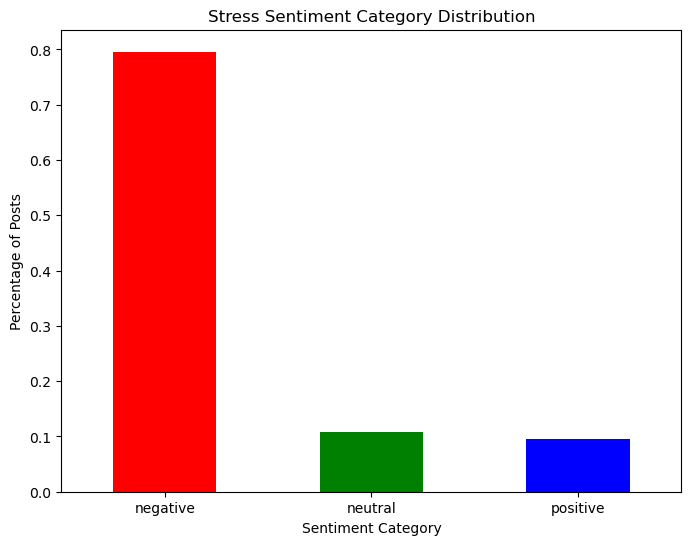

In [26]:
data_numeric['max'] = data_numeric[['negative', 'neutral', 'positive']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()/len(data_numeric)
print(max_counts)

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Stress Sentiment Category Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Posts')
plt.xticks(rotation=0)
plt.show()

In [ ]:
sentiment_stress_p.to_csv("sentiment_stress_p.csv")

## Sentiment Analysis all files

In [ ]:
import pandas as pd
f0 = pd.read_csv("anger.csv")
f0['group'] = 'anger'
f1 = pd.read_csv("anxiety.csv")
f1['group'] = 'anxiety'
f2 = pd.read_csv("depression.csv")
f2['group'] = 'depression'
f3 = pd.read_csv("relationship.csv")
f3['group'] = 'relationship'
f4 = pd.read_csv("stress.csv")
f4['group'] = 'stress'
file_tot = pd.concat([f0, f1, f2, f3, f4], axis=0)
file_tot.head()
#print(len(f0), len(f1), len(f2), len(f3), len(f4), len(f0)+len(f1)+len(f2)+len(f3)+len(f4),len(file_tot))

In [ ]:
#cleaning
file_tot['tot_post'] = file_tot['title'] + ' ' + file_tot['text']
file_tot['tot_post_cleaned'] = file_tot.tot_post.apply(preprocess1)

In [ ]:
all_posts = file_tot[['tot_post','tot_post_cleaned']]
all_posts.head()

In [ ]:
texts = [t for t in all_posts['tot_post_cleaned']]
print(len(texts))

In [ ]:
import pandas as pd
res = sentiment_analysis(texts)
sentiment_all_p = pd.DataFrame(res)

In [ ]:
sentiment_all_p

In [ ]:
l = sentiment_all_p[sentiment_all_p.negative.isnull()]['text'].tolist()
len(l) #problem if different from 0
#sentiment_all_p = sentiment_all_p[sentiment_all_p.labels.isnull()]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_numeric = sentiment_all_p.apply(pd.to_numeric, errors='coerce')
# Plot histograms for the sentiment scores
plt.figure(figsize=(15, 5))

# Histogram for negative sentiment scores
plt.subplot(1, 3, 1)
plt.hist(data_numeric['negative'], bins=20, color='red', alpha=0.7)
plt.title('Negative Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for neutral sentiment scores
plt.subplot(1, 3, 2)
plt.hist(data_numeric['neutral'], bins=20, color='blue', alpha=0.7)
plt.title('Neutral Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Histogram for positive sentiment scores
plt.subplot(1, 3, 3)
plt.hist(data_numeric['positive'], bins=20, color='green', alpha=0.7)
plt.title('Positive Sentiment Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot boxplots for the sentiment scores
plt.figure(figsize=(10, 5))

# Boxplot for all sentiment scores
data_numeric.boxplot(column=['negative', 'neutral', 'positive'])
plt.title('Boxplot of Sentiment Scores')
plt.ylabel('Score')
plt.show()

In [ ]:
data_numeric['max'] = data_numeric[['negative', 'neutral', 'positive']].idxmax(axis=1)
max_counts = data_numeric['max'].value_counts()

# Create a bar chart for the counts
plt.figure(figsize=(8, 6))
max_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Count of Max Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.show()

In [ ]:
sentiment_all_p.to_csv("sentiment_all_p.csv")